# EDA Analysis

Kaggle Dataset - Nutrition Facts for Starbucks Menu
Reference: https://www.kaggle.com/starbucks/starbucks-menu

#### About Dataset

Starbucks is an American coffee chain founded in Seattle. It serves both beverages and food.

This dataset includes the nutritional information for Starbucks’ food and drink menu items. All nutritional information for drinks are for a 12oz serving size.

### Importing libraries

In [1]:
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing

import matplotlib.pyplot as plt
import seaborn as sns

# Suppress deprecation and incorrect usage warnings 
import warnings
warnings.filterwarnings('ignore')

### Reading dataset

In [2]:
df = pd.read_csv('starbucks_drinkMenu_expanded.csv')
df.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


### Exploratory Analysis

In [3]:
df.describe()

,Calories,Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g)
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,193.871901,1.307025,0.037603,6.363636,128.884298,35.991736,0.805785,32.962810,6.978512
std,102.863303,1.640259,0.071377,8.630257,82.303223,20.795186,1.445944,19.730199,4.871659
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,120.000000,0.100000,0.000000,0.000000,70.000000,21.000000,0.000000,18.000000,3.000000
50%,185.000000,0.500000,0.000000,5.000000,125.000000,34.000000,0.000000,32.000000,6.000000
75%,260.000000,2.000000,0.100000,10.000000,170.000000,50.750000,1.000000,43.750000,10.000000
max,510.000000,9.000000,0.300000,40.000000,340.000000,90.000000,8.000000,84.000000,20.000000


In [4]:
# Assessing shape of the data
df.shape

(242, 18)

In [5]:
df.dtypes

Beverage_category             object
Beverage                      object
Beverage_prep                 object
Calories                       int64
 Total Fat (g)                object
Trans Fat (g)                float64
Saturated Fat (g)            float64
 Sodium (mg)                   int64
 Total Carbohydrates (g)       int64
Cholesterol (mg)               int64
 Dietary Fibre (g)             int64
 Sugars (g)                    int64
 Protein (g)                 float64
Vitamin A (% DV)              object
Vitamin C (% DV)              object
 Calcium (% DV)               object
Iron (% DV)                   object
Caffeine (mg)                 object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    object 
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           242 non-null    object 

In [7]:
#check for the null values in each column
df.isnull().sum()

Beverage_category            0
Beverage                     0
Beverage_prep                0
Calories                     0
 Total Fat (g)               0
Trans Fat (g)                0
Saturated Fat (g)            0
 Sodium (mg)                 0
 Total Carbohydrates (g)     0
Cholesterol (mg)             0
 Dietary Fibre (g)           0
 Sugars (g)                  0
 Protein (g)                 0
Vitamin A (% DV)             0
Vitamin C (% DV)             0
 Calcium (% DV)              0
Iron (% DV)                  0
Caffeine (mg)                1
dtype: int64

### Data validation and cleaning

In [8]:
for i in df.columns:
    print ('\033[1m'+i,"\n\033[0m" ,df[i].unique())
    print('\n')

Beverage_category 
 ['Coffee' 'Classic Espresso Drinks' 'Signature Espresso Drinks'
 'Tazo® Tea Drinks' 'Shaken Iced Beverages' 'Smoothies'
 'Frappuccino® Blended Coffee' 'Frappuccino® Light Blended Coffee'
 'Frappuccino® Blended Crème']


Beverage 
 ['Brewed Coffee' 'Caffè Latte' 'Caffè Mocha (Without Whipped Cream)'
 'Vanilla Latte (Or Other Flavoured Latte)' 'Caffè Americano' 'Cappuccino'
 'Espresso' 'Skinny Latte (Any Flavour)' 'Caramel Macchiato'
 'White Chocolate Mocha (Without Whipped Cream)'
 'Hot Chocolate (Without Whipped Cream)'
 'Caramel Apple Spice (Without Whipped Cream)' 'Tazo® Tea'
 'Tazo® Chai Tea Latte' 'Tazo® Green Tea Latte'
 'Tazo® Full-Leaf Tea Latte'
 'Tazo® Full-Leaf Red Tea Latte (Vanilla Rooibos)'
 'Iced Brewed Coffee (With Classic Syrup)'
 'Iced Brewed Coffee (With Milk & Classic Syrup)'
 'Shaken Iced Tazo® Tea (With Classic Syrup)'
 'Shaken Iced Tazo® Tea Lemonade (With Classic Syrup)'
 'Banana Chocolate Smoothie' 'Orange Mango Banana Smoothie'
 'Strawberry 

In [9]:
df['Caffeine (mg)'].unique()

array(['175', '260', '330', '410', '75', '150', '85', '95', '180', '225',
       '300', '10', '20', '25', '30', '0', 'Varies', '50', '70', '120',
       '55', '80', '110', 'varies', '165', '235', '90', nan, '125', '170',
       '15', '130', '140', '100', '145', '65', '105'], dtype=object)

We notice there is a text entry - `Varies`, `varies` replacing all such values to null

In [10]:
df['Caffeine (mg)'] = df['Caffeine (mg)'].replace('Varies', np.NaN).replace('varies', np.NaN)

In [11]:
df['Caffeine (mg)'].unique()

array(['175', '260', '330', '410', '75', '150', '85', '95', '180', '225',
       '300', '10', '20', '25', '30', '0', nan, '50', '70', '120', '55',
       '80', '110', '165', '235', '90', '125', '170', '15', '130', '140',
       '100', '145', '65', '105'], dtype=object)

In [12]:
df[' Total Fat (g)'].unique()

array(['0.1', '3.5', '2.5', '0.2', '6', '4.5', '0.3', '7', '5', '0.4',
       '9', '1.5', '4', '2', '8', '3', '11', '0', '1', '10', '15', '13',
       '0.5', '3 2'], dtype=object)

We noticed there is a space in one of the values

In [13]:
df[' Total Fat (g)'] = df[' Total Fat (g)'].replace('3 2', '3.2')

In [14]:
df[' Total Fat (g)'].unique()

array(['0.1', '3.5', '2.5', '0.2', '6', '4.5', '0.3', '7', '5', '0.4',
       '9', '1.5', '4', '2', '8', '3', '11', '0', '1', '10', '15', '13',
       '0.5', '3.2'], dtype=object)

### Data distributions

In [15]:
df.columns

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
       ' Sugars (g)', ' Protein (g) ', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
       ' Calcium (% DV) ', 'Iron (% DV) ', 'Caffeine (mg)'],
      dtype='object')

In [16]:
df.describe()

,Calories,Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g)
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,193.871901,1.307025,0.037603,6.363636,128.884298,35.991736,0.805785,32.962810,6.978512
std,102.863303,1.640259,0.071377,8.630257,82.303223,20.795186,1.445944,19.730199,4.871659
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,120.000000,0.100000,0.000000,0.000000,70.000000,21.000000,0.000000,18.000000,3.000000
50%,185.000000,0.500000,0.000000,5.000000,125.000000,34.000000,0.000000,32.000000,6.000000
75%,260.000000,2.000000,0.100000,10.000000,170.000000,50.750000,1.000000,43.750000,10.000000
max,510.000000,9.000000,0.300000,40.000000,340.000000,90.000000,8.000000,84.000000,20.000000


Text(0, 0.5, 'Count')

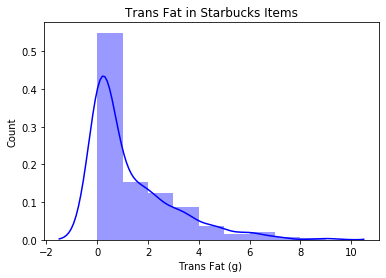

In [17]:
trans_fat = df['Trans Fat (g) ']
sns.distplot(trans_fat, kde=True, bins=9, color='blue').set_title('Trans Fat in Starbucks Items')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

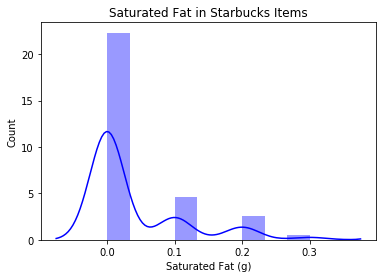

In [18]:
saturated_fat = df['Saturated Fat (g)']
sns.distplot(saturated_fat, kde=True, bins=9, color='blue').set_title('Saturated Fat in Starbucks Items')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

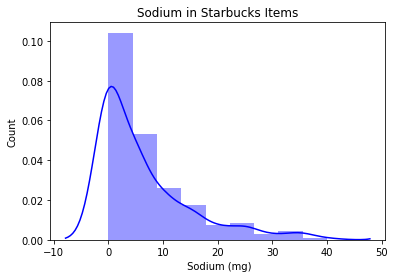

In [19]:
sodium = df[' Sodium (mg)']
sns.distplot(sodium, kde=True, bins=9, color='blue').set_title('Sodium in Starbucks Items')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

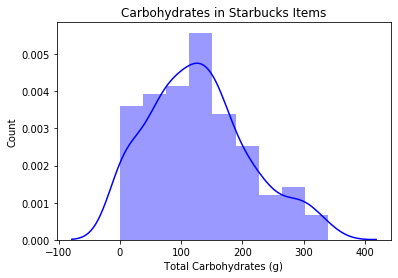

In [20]:
carbohydrates = df[' Total Carbohydrates (g) ']
sns.distplot(carbohydrates, kde=True, bins=9, color='blue').set_title('Carbohydrates in Starbucks Items')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

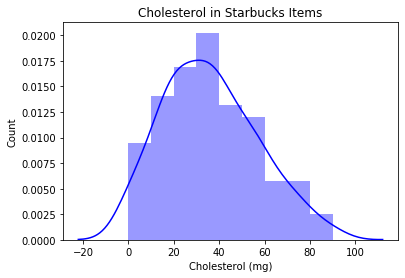

In [21]:
cholesterol = df['Cholesterol (mg)']
sns.distplot(cholesterol, kde=True, bins=9, color='blue').set_title('Cholesterol in Starbucks Items')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

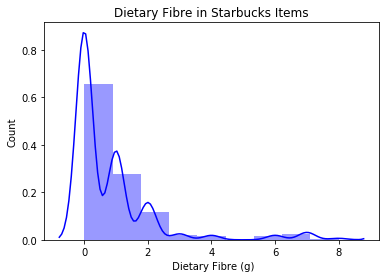

In [22]:
dietary_fibre = df[' Dietary Fibre (g)']
sns.distplot(dietary_fibre, kde=True, bins=9, color='blue').set_title('Dietary Fibre in Starbucks Items')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

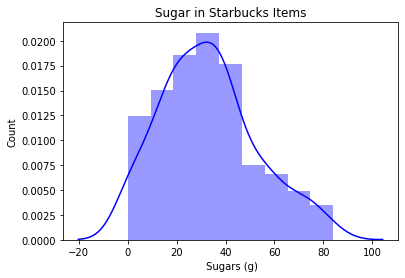

In [23]:
sugar = df[' Sugars (g)']
sns.distplot(sugar, kde=True, bins=9, color='blue').set_title('Sugar in Starbucks Items')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

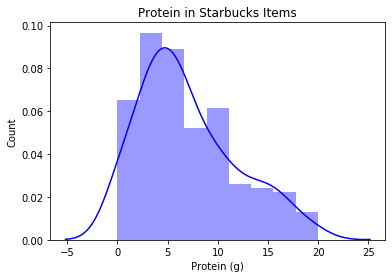

In [24]:
protein = df[' Protein (g) ']
sns.distplot(protein, kde=True, bins=9, color='blue').set_title('Protein in Starbucks Items')
plt.ylabel('Count')

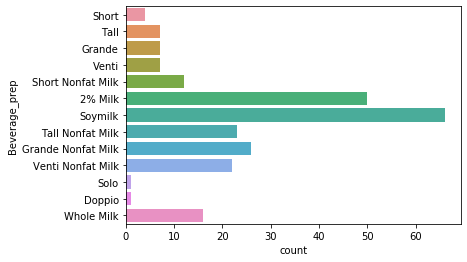

In [25]:
sns.countplot(y='Beverage_prep', data=df)

From above, we can infer that different milk options results in different calories.

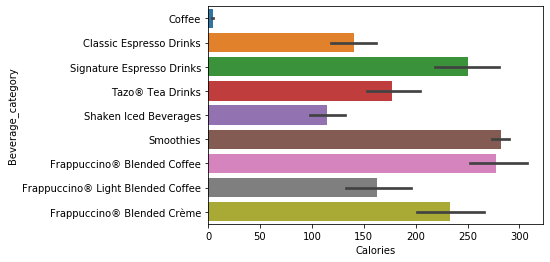

In [26]:
sns.barplot(x = 'Calories' , y='Beverage_category', data=df)

The above chart gives us a sense about which type of drink has relatively lower or higher level of calories

In [27]:
df.groupby('Beverage_category').size().sort_values(ascending=False)

Beverage_category
Classic Espresso Drinks              58
Tazo® Tea Drinks                     52
Signature Espresso Drinks            40
Frappuccino® Blended Coffee          36
Shaken Iced Beverages                18
Frappuccino® Blended Crème           13
Frappuccino® Light Blended Coffee    12
Smoothies                             9
Coffee                                4
dtype: int64

### Correlation Analysis

In [28]:
df.corr()

,Calories,Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g)
Calories,1.000000,0.642818,0.331047,0.387892,0.795037,0.940034,0.384292,0.909675,0.578453
Trans Fat (g),0.642818,1.000000,0.694871,0.707794,0.524176,0.439811,0.131267,0.419887,0.496317
Saturated Fat (g),0.331047,0.694871,1.000000,0.920077,0.238142,0.161791,-0.093783,0.179255,0.287532
Sodium (mg),0.387892,0.707794,0.920077,1.000000,0.290295,0.199477,-0.060154,0.205969,0.496233
Total Carbohydrates (g),0.795037,0.524176,0.238142,0.290295,1.000000,0.766654,0.173378,0.771407,0.410629
Cholesterol (mg),0.940034,0.439811,0.161791,0.199477,0.766654,1.000000,0.342040,0.984196,0.360449
Dietary Fibre (g),0.384292,0.131267,-0.093783,-0.060154,0.173378,0.342040,1.000000,0.184171,0.540274
Sugars (g),0.909675,0.419887,0.179255,0.205969,0.771407,0.984196,0.184171,1.000000,0.263061
Protein (g),0.578453,0.496317,0.287532,0.496233,0.410629,0.360449,0.540274,0.263061,1.000000


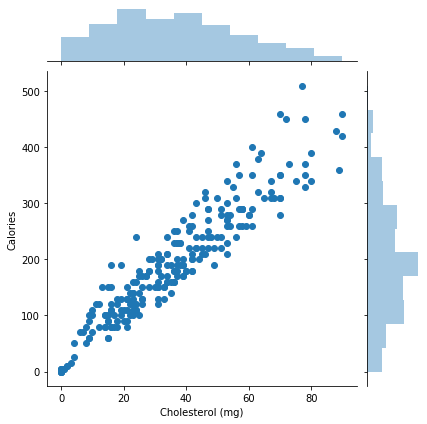

In [29]:
sns.jointplot(x = 'Cholesterol (mg)', y = 'Calories' , data = df)

Calories and Cholestrol are highly correlated in the positive direction

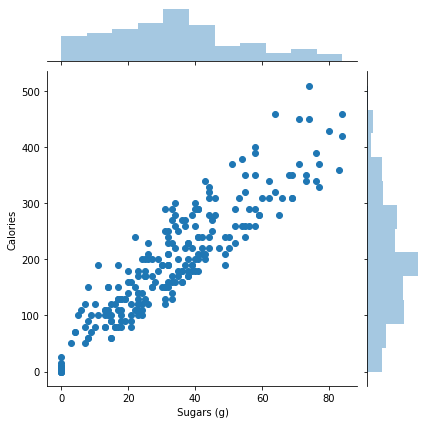

In [30]:
sns.jointplot(x = ' Sugars (g)', y = 'Calories' , data = df)

We see that sugar and calories are nearly proportionally related.

### Future Scope
- Using prediction/classification analysis for one of the beverages